In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
numcols = [x for x in df.columns if df[x].dtype != 'object']
numcols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
num_features = len(numcols)
rows = np.ceil(np.sqrt(num_features)).astype(int)
cols = np.ceil(num_features / rows).astype(int)
print(rows,cols)

4 4


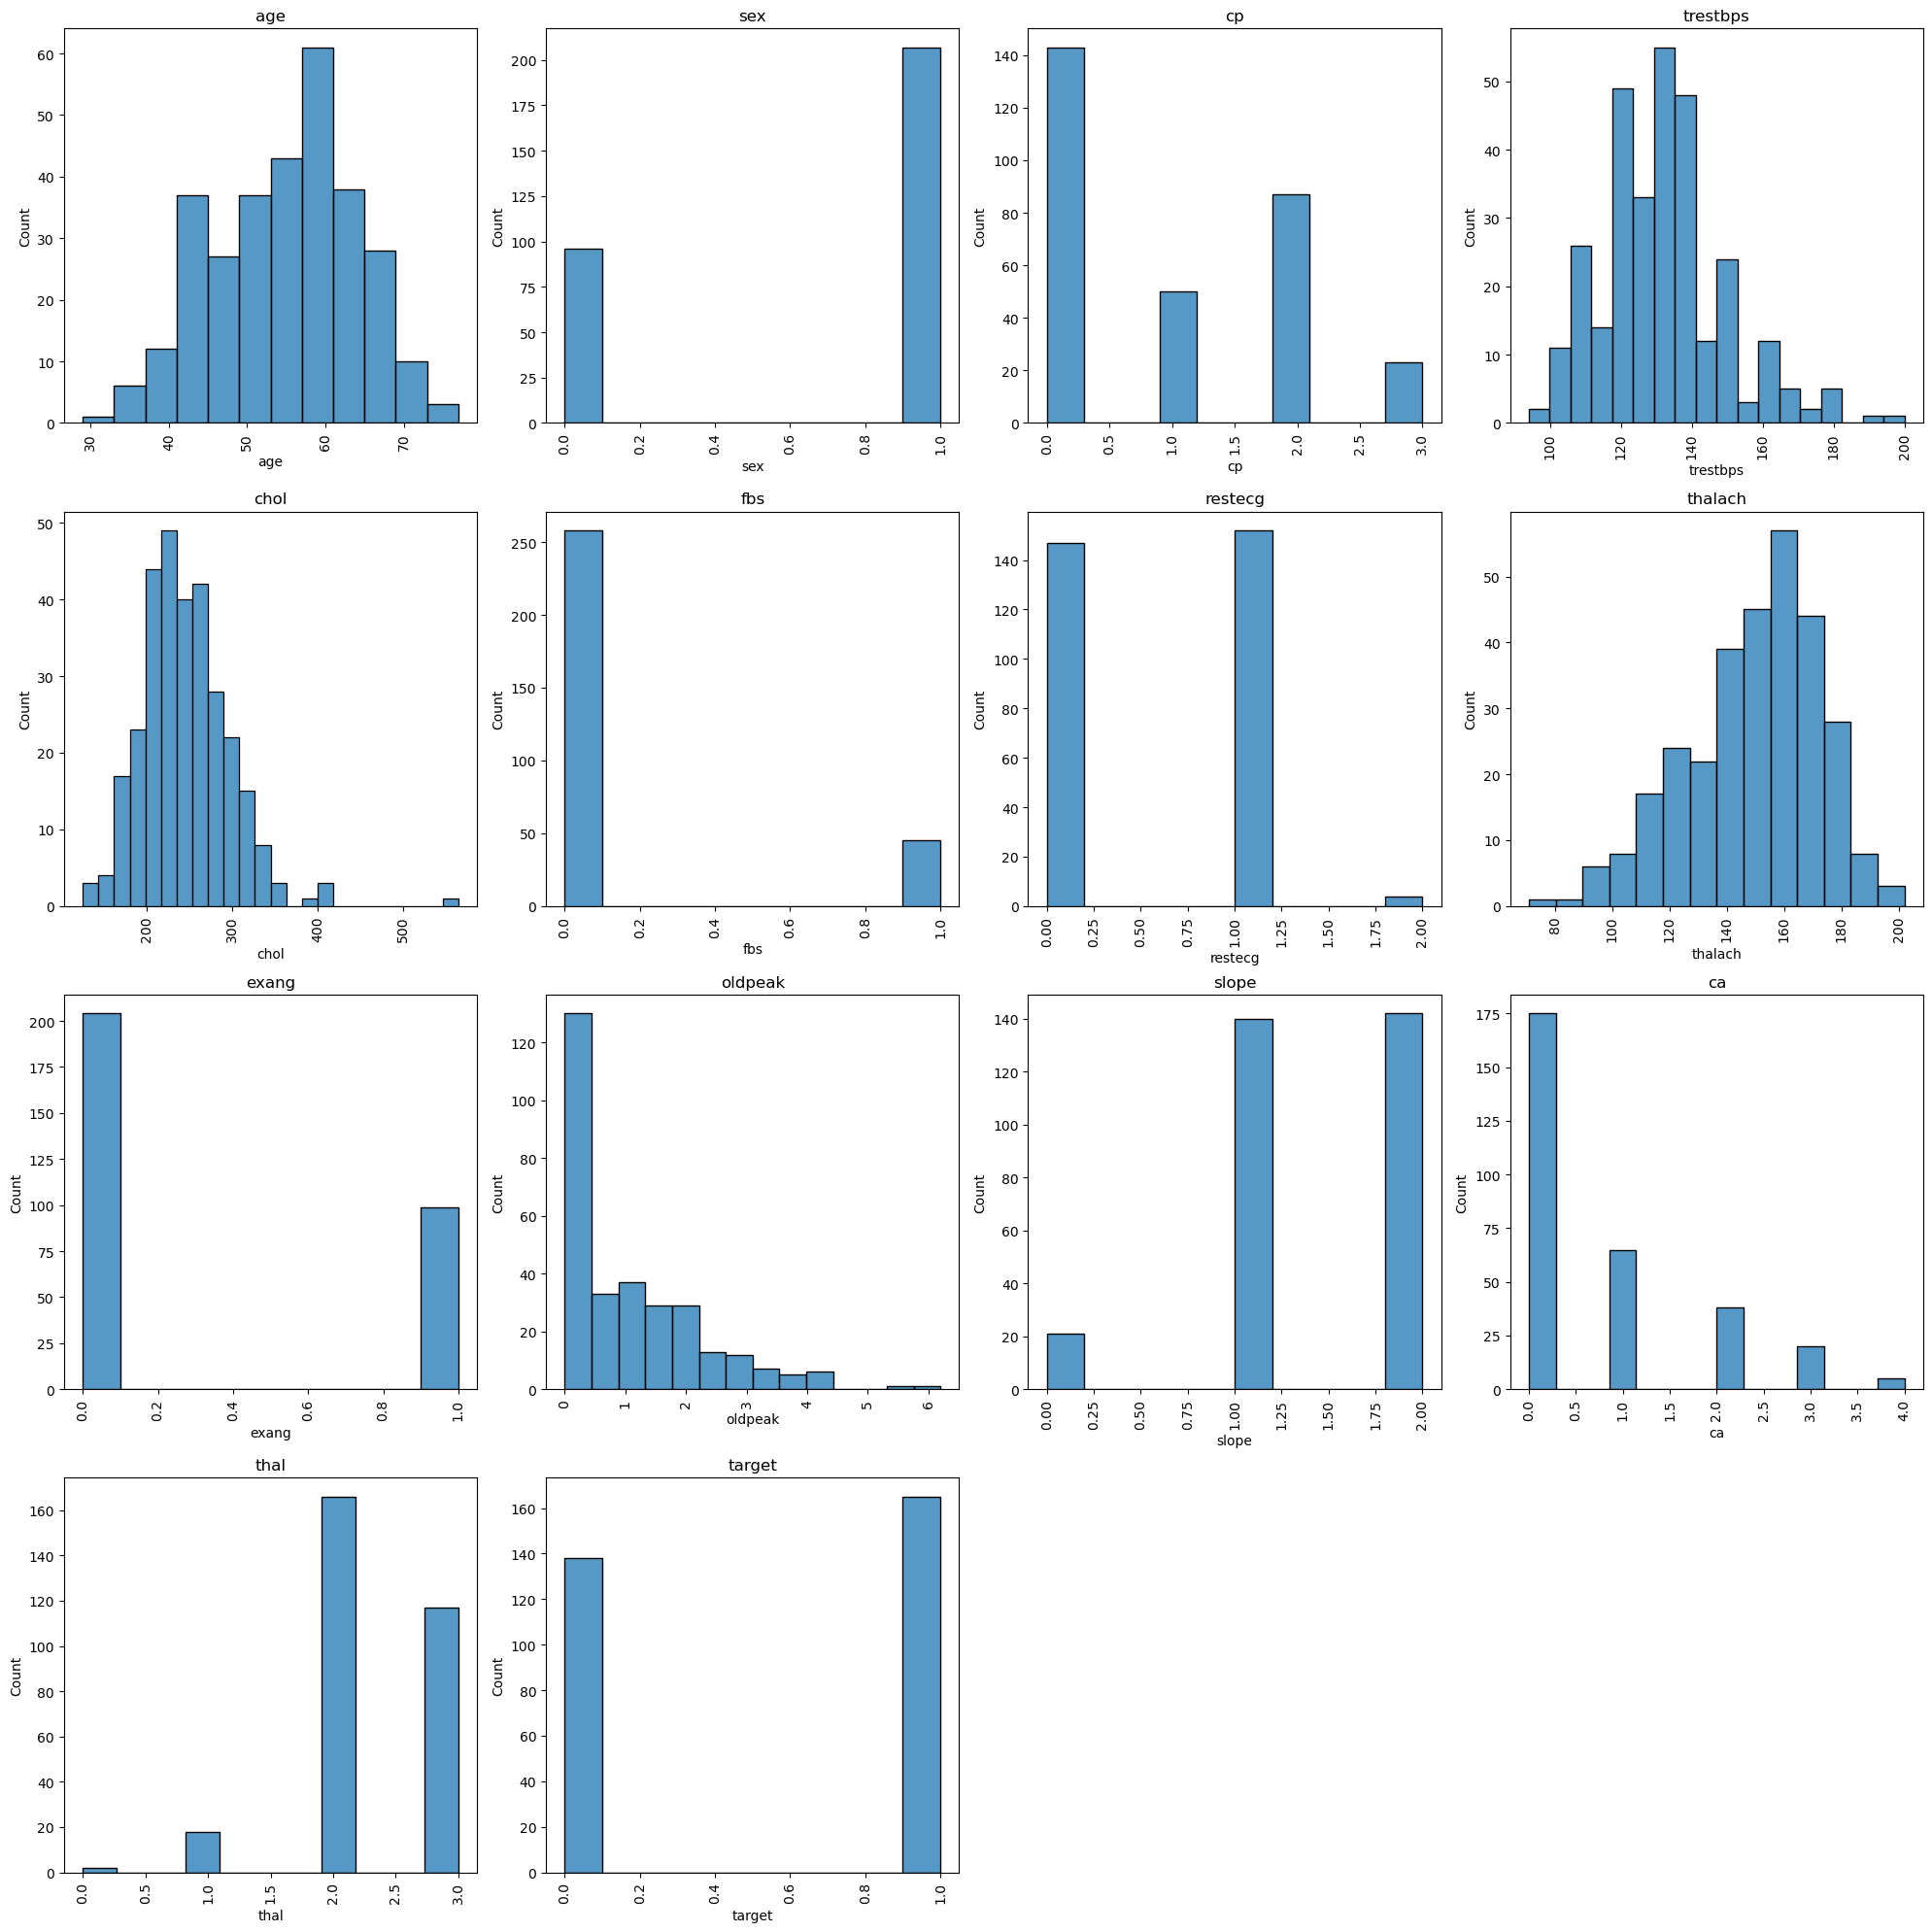

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(numcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

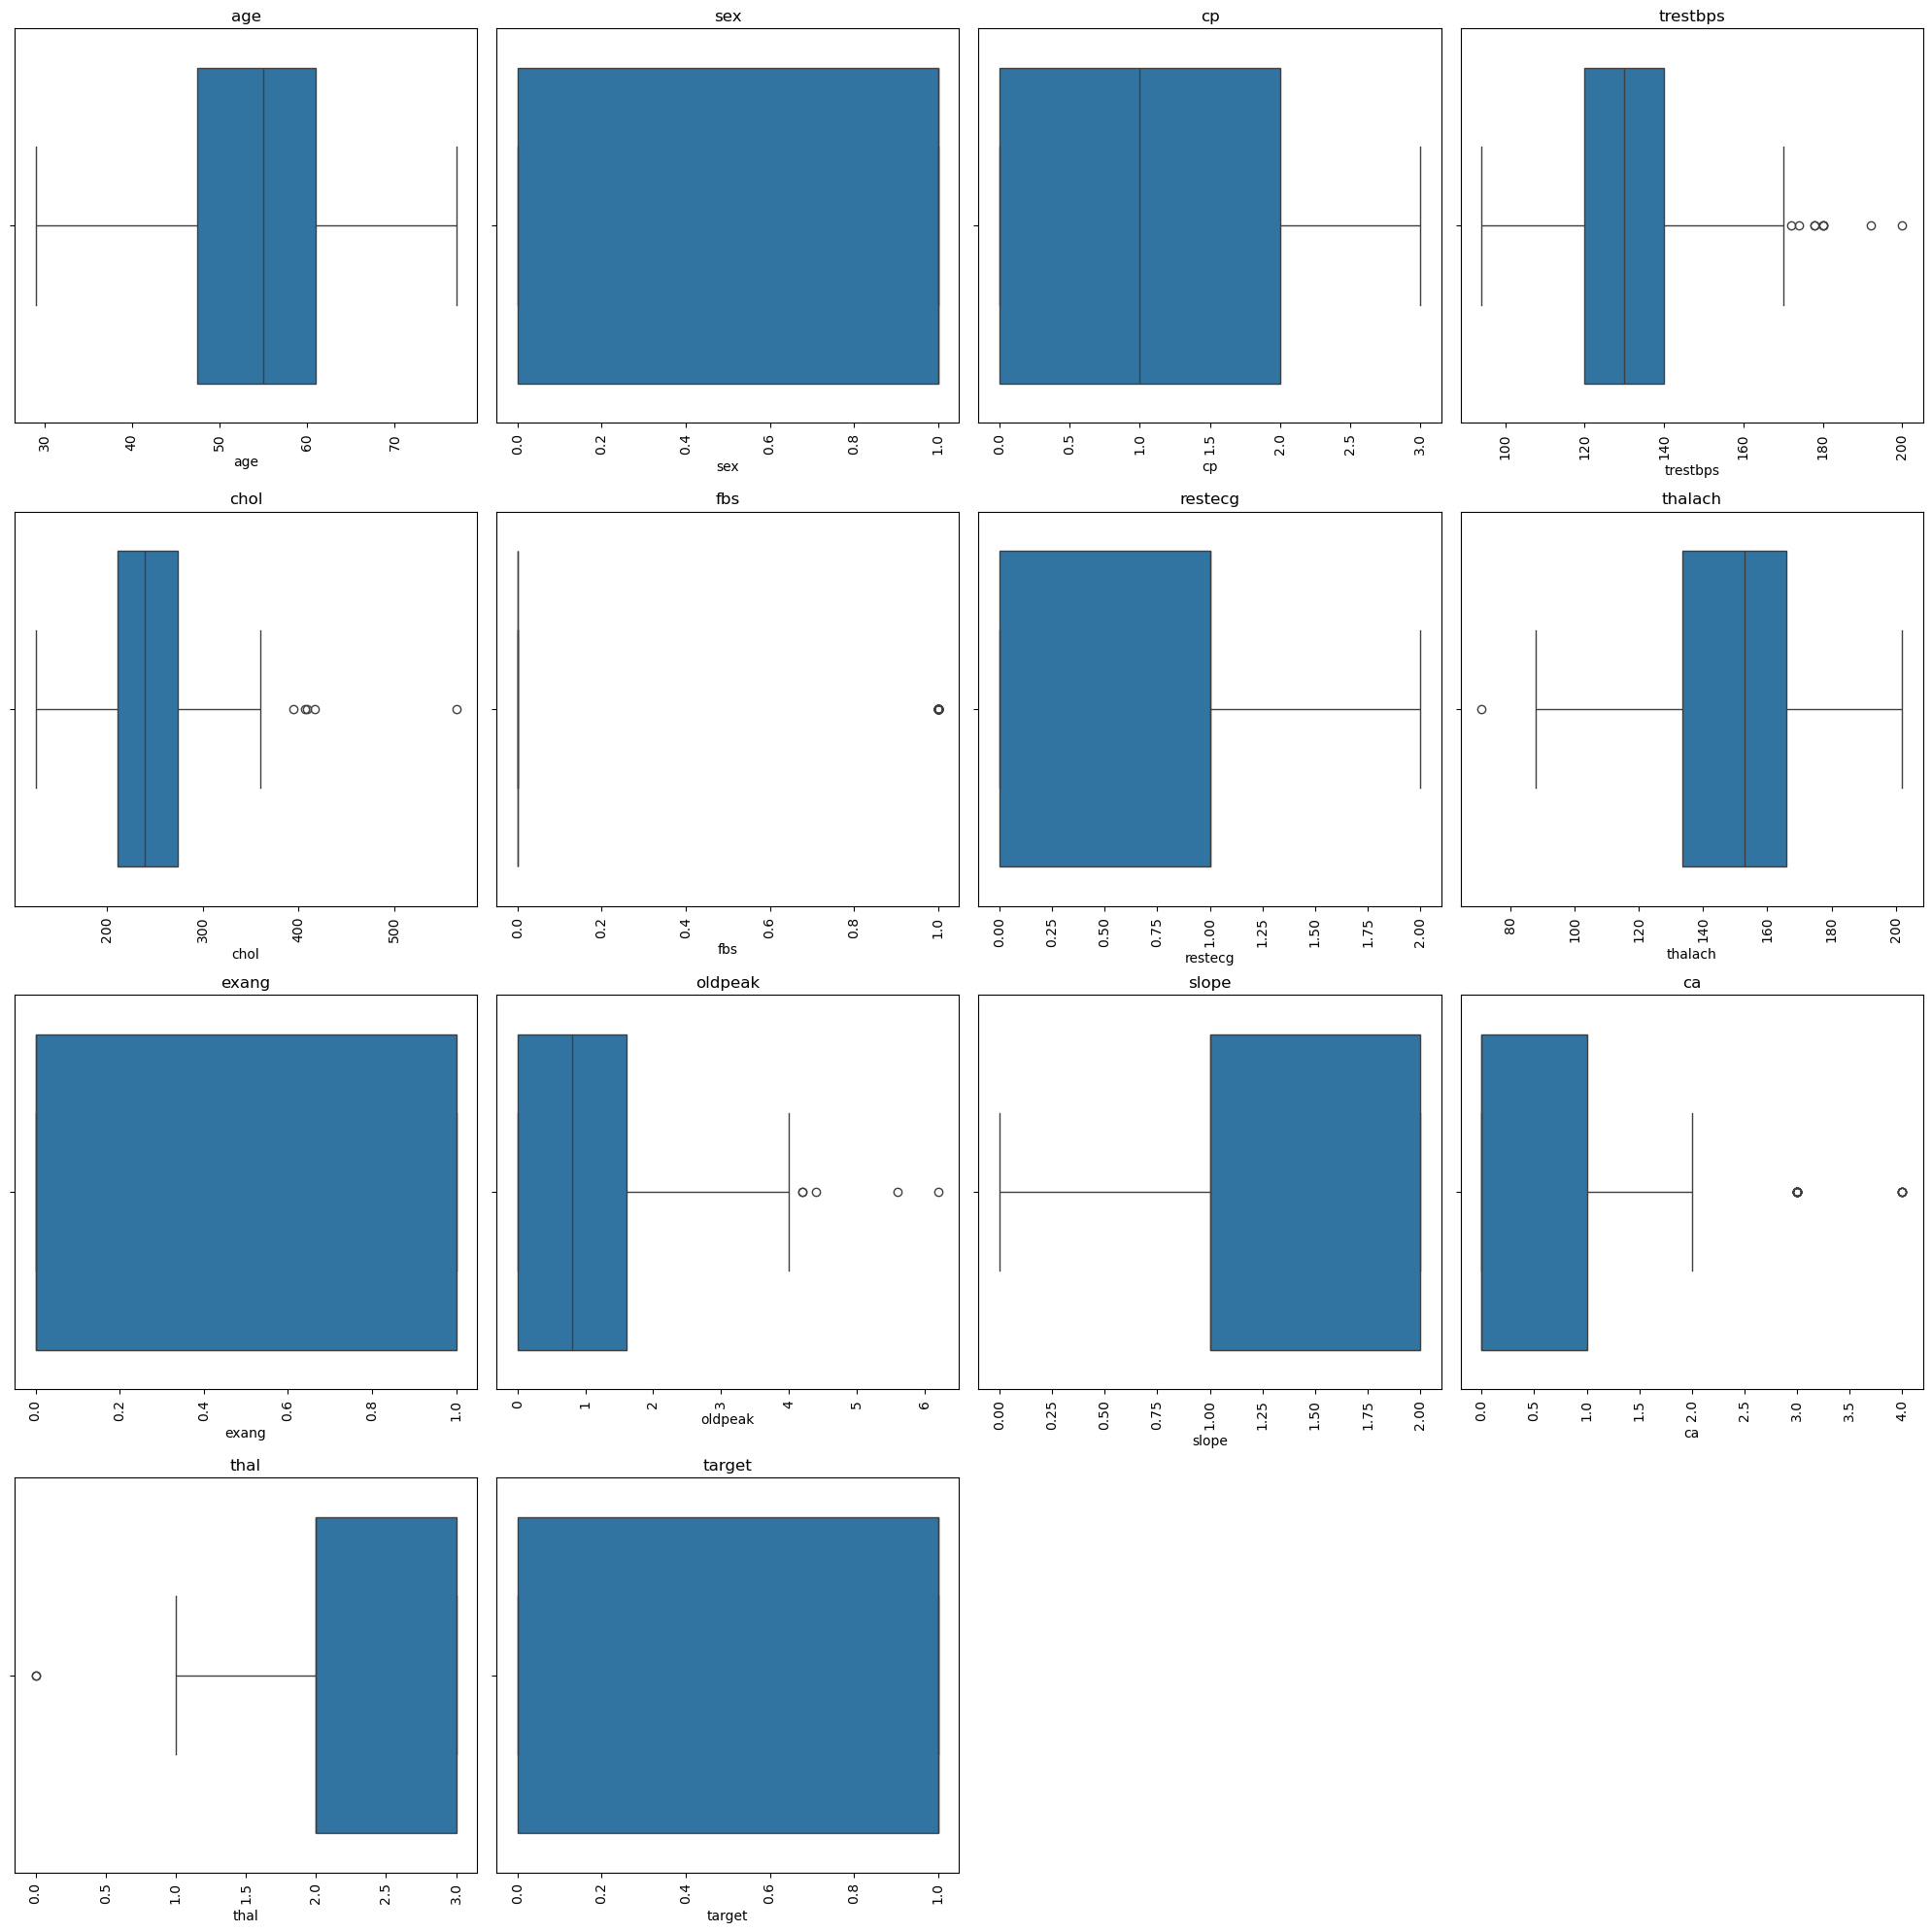

In [15]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(numcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

In [17]:
df.groupby(['target']).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [21]:
df.groupby(['target']).count().reset_index()

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,1,165,165,165,165,165,165,165,165,165,165,165,165,165


In [23]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [25]:
target0 = df[df['target'] == 0]
target1 = df[df['target'] == 1]

In [27]:
df_sample = target1.sample(138)

In [29]:
df_merge = pd.concat([target0,df_sample],axis=0)
df_merge.shape

(276, 14)

In [59]:
df_merge.corr()['target']

age        -0.248134
sex        -0.283473
cp          0.453836
trestbps   -0.144804
chol       -0.064868
fbs        -0.020174
restecg     0.109764
thalach     0.434242
exang      -0.434684
oldpeak    -0.425082
slope       0.357447
ca         -0.381695
thal       -0.333779
target      1.000000
Name: target, dtype: float64

In [113]:
X = df_merge.drop(columns=['target','chol','fbs'])
y = df_merge['target']

In [31]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=42)

In [117]:
X_train.shape

(234, 11)

In [119]:
y_test.shape

(42,)

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [121]:
X_train_scaled = scaler.fit_transform(X_train)

In [123]:
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression()

In [125]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [127]:
lr.score(X_test_scaled,y_test)

0.8571428571428571

In [153]:
train_acc = lr.predict(X_train_scaled)

In [155]:
accuracy_score(y_train,train_acc)

0.8675213675213675

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [157]:
dt_classifier = DecisionTreeClassifier(random_state=123)

In [159]:
dt_classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=123)

In [161]:
dt_classifier.score(X_test_scaled,y_test)

0.7142857142857143

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=142)

In [165]:
rf_classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=142)

In [167]:
rf_classifier.score(X_test_scaled,y_test)

0.7857142857142857

In [79]:
from sklearn.svm import SVC

In [81]:
svm_classifier = SVC(kernel='linear', random_state=42)

In [139]:
svm_classifier.fit(X_train_scaled,y_train)

SVC(kernel='linear', random_state=42)

In [141]:
svm_classifier.score(X_test_scaled,y_test)

0.7857142857142857

In [91]:
from sklearn.naive_bayes import GaussianNB

In [99]:
nb_classifier = GaussianNB(var_smoothing=1e-9)

In [143]:
nb_classifier.fit(X_train_scaled,y_train)

GaussianNB()

In [145]:
nb_classifier.score(X_test_scaled,y_test)

0.7857142857142857

In [147]:
y_pred = nb_classifier.predict(X_test_scaled)

In [149]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.7857142857142857


import pickle